# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель - установить средние значения параметров (характеристик) недвижимость в Санкт-Петербурге и ближайших населенных пунктах.**

Для достижения поставленной цели, мы должны решить следующие задачи

**Задачи работы:**

1) Провести разведочный анализ данных (выделить проблемные столбцы). Предположить причину пропусков в них.

2) Провести предобработку данных - заполнение пропущенных значений, изменение форматов (типов данных)

3) Категоризация по имеющимся данным (по году, дням, день недели)

4) Вычисление производных признаков (цена за квадратный метр)

5) Визуальный анализ распределений признаков (гистограммы)

6) Первичный факторный статистический анализ (корреляция)

7) Сегментация квартир в центре Санкт-Петербурге и за его пределами. Выделение закономерности в распределении стоимости, а также характерных черт недвижимости в этом районе.

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import norm

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', encoding='utf-8')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
df.sort_values(by='first_day_exposition', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12003,10,950000.0,37.10,2019-05-03T00:00:00,1,NaN,4.0,17.00,4,False,False,False,8.40,2.0,деревня Курковицы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14246,14,6200000.0,86.20,2019-05-03T00:00:00,3,NaN,10.0,49.50,7,NaN,False,False,17.00,NaN,деревня Куттузи,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3254,16,8800000.0,80.00,2019-05-03T00:00:00,3,2.80,17.0,31.00,15,NaN,False,False,27.00,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12343,12,2890000.0,48.80,2019-05-03T00:00:00,2,2.55,5.0,29.40,1,NaN,False,False,7.20,NaN,городской посёлок Рощино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5986,0,5000000.0,48.00,2019-05-03T00:00:00,3,2.50,9.0,NaN,2,NaN,False,False,NaN,NaN,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN
12380,9,3900000.0,35.60,2019-05-03T00:00:00,1,2.50,12.0,18.00,12,NaN,False,False,10.80,2.0,Санкт-Петербург,41522.0,12331.0,2.0,371.0,0.0,NaN,NaN
13993,6,3300000.0,43.00,2019-05-03T00:00:00,1,2.60,17.0,18.00,3,NaN,False,False,10.50,NaN,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,NaN
17551,7,3200000.0,45.60,2019-05-03T00:00:00,2,NaN,5.0,30.90,5,False,False,False,5.60,1.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8170,4,3280000.0,38.19,2019-05-03T00:00:00,1,NaN,6.0,14.41,4,NaN,False,False,10.26,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9217,7,4300000.0,35.70,2019-05-03T00:00:00,1,2.70,21.0,15.00,12,False,False,False,13.00,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.duplicated().sum()

0

### Вывод 
Очевидно, что исходный набор данных имеет пропуски в некоторых столбцах. 

В имеющихся данных насчитывается 23699 записей. Некоторые записи имеют пропущенные значения, дубликаты отсутствуют. На следующем этапе потребуется предобработать данные по имеющимся сведениям там, где это возможно.


Просмотрев краткие сведения по имеющейся информации, мы можем сказать, что не во всех столцах пропущенные значения могут быть заменены дедуктивным путем (по смыслу) или эмпирическим, основываясь на данных по другим столбцам. Таким образом, нами будет проведено значений в тех местах, для которых можно предположить логичное значение.

Причинами же пропусков в данных могли стать субъективные причины (пользователи не указывали детальную информацию о своей квартире, продающий не знал относится ли она к апартаментам или другим типам), так и объективные, например, геосервис не давал информацию об удалении от центра города, парков, прудов, потому что в сельской местности, где не обнаруживается подобных мест.

### Шаг 2. Предобработка данных

**Если не указано количество балконов, то, скорее всего, их нет. Поэтмоу можно заполнить пустые значения ячеек нулями и сразу привести этот столбец к булевому типу данных**

In [7]:
df['balcony'] = df['balcony'].fillna(0).astype('bool')

В каждой квартире должна иметь хотя бы одна комната, поэтому пропущенные значения в столбце `rooms` можно заменить на 1

In [8]:
df['rooms'] = df['rooms'].fillna(1)

Апартаменты - особый вид недвижимости, который не подходит под юридические критерии жилья. Многие граждане наши страны не осведомлены о наличии такого типа помещений, соответственно, можно предположить, что если значение не указано - оно не является апартаментами

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(0).astype('bool')

Переведем значения столбца `first_day_exposition` для упрощения работы и извлечения дополнительной информации по дате размещения объявления

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Следующий список столбцов:

`['last_price', 'floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']`

можно перевести в целочисленный тип данных

In [11]:

#по какой-то причине столбец с днями размещения не захотел переводиться в int - выдавал ошибку. Это баг?

integers = ['last_price', 'floors_total', 'airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']
df[integers] = df[integers].astype('Int64', errors ='ignore')
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,False,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,True,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,False,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,False,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,False,Санкт-Петербург,31856,8098,2,112,1,48,121.0


**Также можно обработать столбец с названием населенного пункта для вывода категорий населенных пункт в исходной базе:**

Для этого заменим символ буквы ё на е, а пропущенные значения на строку 'unknown' и выведем список уникальных значений для столбца `locality_name`

In [12]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Лесогорский', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Свирьстрой', 'городской поселок Советский',
       'гор

In [13]:
df[(df['locality_name'] == 'unknown') &(df['cityCenters_nearest'] > 0)].sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22474,7,24000000,128.00,2015-07-24,4,2.75,6,68.40,6,False,False,False,16.50,False,unknown,23297,1780,3,277,3,561,436.0
4151,17,17600000,89.50,2014-12-09,2,3.00,8,39.62,7,False,False,False,13.38,False,unknown,25054,3902,1,485,3,722,869.0
21276,0,17122148,178.30,2017-02-10,1,NaN,3,NaN,1,False,False,False,41.60,True,unknown,60195,41294,0,NaN,0,NaN,4.0
8568,10,16000000,155.00,2016-05-09,3,NaN,6,94.00,3,False,False,False,23.00,False,unknown,24233,4065,1,547,0,NaN,248.0
5343,19,13540000,85.50,2016-01-20,3,NaN,7,59.10,5,False,False,False,8.30,True,unknown,10556,9538,1,67,0,NaN,303.0
16610,11,11940000,112.00,2015-11-19,3,3.00,5,64.00,2,False,False,False,23.00,False,unknown,21219,1322,1,740,3,365,319.0
20057,13,11500000,102.00,2015-10-14,2,NaN,5,70.00,2,False,False,False,NaN,False,unknown,23478,4258,0,NaN,0,NaN,325.0
18526,3,10800000,86.00,2016-06-24,4,3.20,7,48.00,2,False,False,False,12.00,False,unknown,11206,8943,0,NaN,0,NaN,65.0
4189,7,9200000,80.00,2015-12-10,3,4.00,4,52.30,3,False,False,False,10.40,False,unknown,21774,3039,1,690,1,953,223.0
1097,3,8600000,81.70,2016-04-15,3,3.55,5,50.80,2,False,False,False,8.80,False,unknown,23478,4258,0,NaN,0,NaN,147.0


В данных особенности, хоть для этих записей и пропущены значения с названием населенного пункта, однако большинство из них явно подходят по описанию в остальных столбцах на объекты недвижимости в Санкт-Петербурге, так как имеют повышенную стоимость, расположены к городскому центру и аэропорту (судя по всему здесь всегда имеется ввиду аэропорт Пулково), имеют рядом пруды и парки. Проверим по Яндекс.Картам:

https://yandex.ru/maps/?ll=30.415353%2C59.928760&mode=search&ol=geo&ouri=ymapsbm1%3A%2F%2Fgeo%3Fll%3D30.316%252C59.939%26spn%3D1.334%252C0.611%26text%3D%25D0%25A0%25D0%25BE%25D1%2581%25D1%2581%25D0%25B8%25D1%258F%252C%2520%25D0%25A1%25D0%25B0%25D0%25BD%25D0%25BA%25D1%2582-%25D0%259F%25D0%25B5%25D1%2582%25D0%25B5%25D1%2580%25D0%25B1%25D1%2583%25D1%2580%25D0%25B3&rl=30.269076%2C59.794394~0.046727%2C0.145071&z=9.43

https://yandex.ru/maps/?ll=30.092318%2C59.940672&mode=search&ol=geo&ouri=ymapsbm1%3A%2F%2Fgeo%3Fll%3D30.316%252C59.939%26spn%3D1.334%252C0.611%26text%3D%25D0%25A0%25D0%25BE%25D1%2581%25D1%2581%25D0%25B8%25D1%258F%252C%2520%25D0%25A1%25D0%25B0%25D0%25BD%25D0%25BA%25D1%2582-%25D0%259F%25D0%25B5%25D1%2582%25D0%25B5%25D1%2580%25D0%25B1%25D1%2583%25D1%2580%25D0%25B3&rl=30.275859%2C59.798395~0.039330%2C0.139537&z=9.33

По Картам видно, что расстояние от границ КАДа до Пулково не превышает 36 км (самое большое расстояние в границах КАДа), а от центра до Пулково - 16 км (До другой точки КАД - примерно столько же или чуть меньше). Таким образом, можно отобрать такие данные, которые будут удовлетворять этому условию и проставить в них местоположение как Санкт-Петербург.


In [16]:
def settlement_type(row):
    string = row['locality_name']
    list_c = string.split(' ')
    if 'Санкт-Петербург' in list_c:
        return 'big_city'
    elif 'деревня' in list_c or 'садовое' in list_c or 'село' in list_c or 'товарищество' in list_c:
        return 'village'
    elif 'поселок' in list_c:
        return 'settlement'
    elif 'unknown' in list_c:
        return 'unknown'
    else:
        return 'town'

In [17]:
try:
    
    df['type_settlement'] = df.apply(settlement_type, axis=1)
except:
    print('Rewrite function')

In [18]:
df.groupby('type_settlement')['locality_name'].count()

type_settlement
big_city      15721
settlement     2660
town           4287
unknown          49
village         982
Name: locality_name, dtype: int64

Функция сработала, посмотрим на количество пропущенных значений в столбце

In [19]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
type_settlement             0
dtype: int64

На данном этапе мы привели исходный набор данных к состоянию, в котором можно проводить исследовательский анализ данных. В том числе, нам удалось заполнить пропуски в населенных пунктах по выработанной гипотезе, которую мы посчитали условно верной.

### Шаг 3. Посчитайте и добавьте в таблицу

**Теперь можно перейти к вычислению дополнительных данных и добавления их в нормализованную таблицу. Напомним, что нам понадобятся:**

1) цена квадратного метра;

2) день недели, месяц и год публикации объявления;

3) этаж квартиры;

4) соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
df['price_per_meters'] = df['last_price'] / df['total_area']
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

В предложенном алгоритме действий для выполнения задания предложено провести сегментирование расположения квартиры по этажам по трем категориям - первый этаж, последний этаж, все остальные.

Заполним пропущенные значения этажа (-1).
Для категоризации напишем функцию, которая присваевает категорию по этажу в сравнении с общей этажностью здания

In [21]:
df['floors_total'] = df['floors_total'].fillna(-1)

In [22]:
def height_class(row):
    if row['floors_total'] == row['floor']:
        return 'last'
    elif row['floor'] == 1:
        return 'first'
    else:
        return 'other'
    


In [23]:
df['flat_type'] = df.apply(height_class, axis=1)
df.groupby('flat_type')['flat_type'].count()

flat_type
first     2892
last      3361
other    17446
Name: flat_type, dtype: int64

Вычислим отношение площади жилой и кухонной зоны к общей для каждого столбца для имеющихся значений. Результат запишем в отдельный столбцы `living_to_total` & `kitchen_to_total` соответственно.

In [24]:
df['living_to_total'] = df['living_area']/df['total_area']
df['kitchen_to_total'] = df['kitchen_area']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_per_meters,weekday,month,year,flat_type,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,False,Санкт-Петербург,18863,16028,1,482,2,755,NaN,big_city,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,True,поселок Шушары,12817,18603,0,NaN,0,NaN,81.0,settlement,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,False,Санкт-Петербург,21741,13933,1,90,2,574,558.0,big_city,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,False,Санкт-Петербург,28098,6800,2,84,3,234,424.0,big_city,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,False,Санкт-Петербург,31856,8098,2,112,1,48,121.0,big_city,100000.000000,1,6,2018,other,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Для целей анализа и представления результатов по имеющимся данным используем библиотеку matplotlib & seaborn для визуализации и исследовательского анализа распределения признаков - площадь, цена, число комнат, высота потолков.**


In [25]:
def dist_hist(data, col,limit, bins, title):
    plt.figure(figsize=(10,6))
    plt.xlim(limit)
    ax = sns.distplot(data[col], kde=False, bins= bins).set_title(title)
    return ax

Text(0.5, 1.0, 'Площадь')

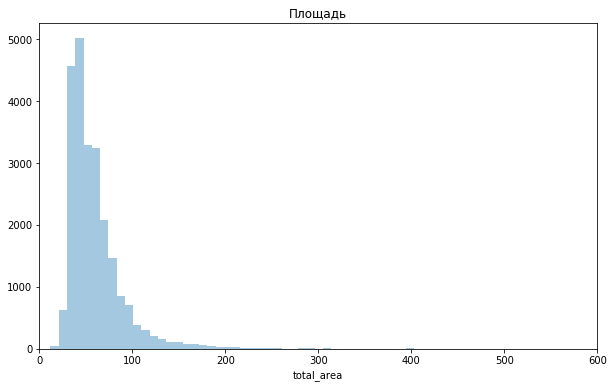

In [26]:
dist_hist(df,'total_area',(0,600),100,'Площадь')

Распределение имеет вид распределения Пуассона - много значений между 40 и 120, однако есть выбросы, которые можно будет увидеть позже.

Text(0.5, 1.0, 'Стоимость')

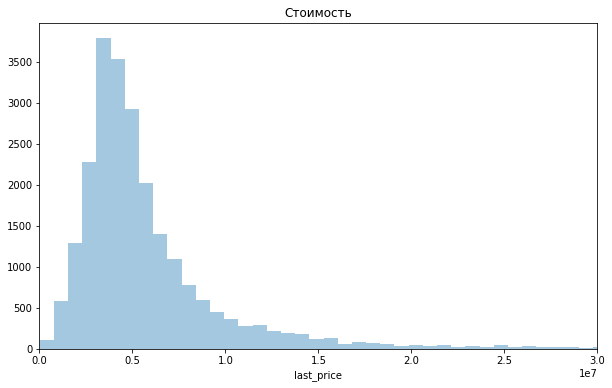

In [27]:
dist_hist(df,'last_price', (0,30000000), 1000,'Стоимость')

Для примера мы вывели объявления, в которых стоимость недвижимости не превышает 30 млн. рублей. Однако очевидно, что есть такие объекты недвижимости (скорее всего, в Санкт-Петербурге), которые обладают большей стоимостью. В целом, здесь мы тоже видим ассиметричное распределение Пуассона - значения сконцентрированы в районе стоимости до 10 млн.рублей

Text(0.5, 1.0, 'Количество комнат')

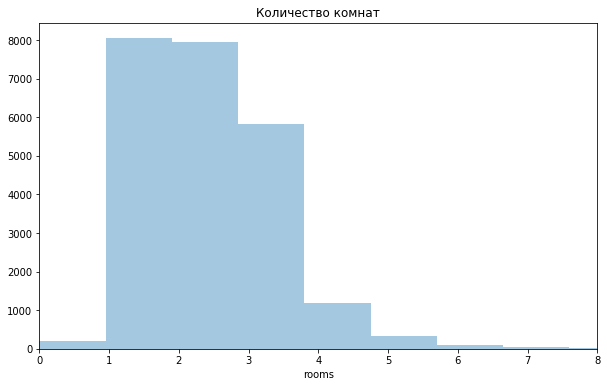

In [28]:
dist_hist(df,'rooms', (0,8), 20,'Количество комнат')

Больше всего объявлений с количеством комнат до 5-ти единиц на один объект

Text(0.5, 1.0, 'Высота потолка')

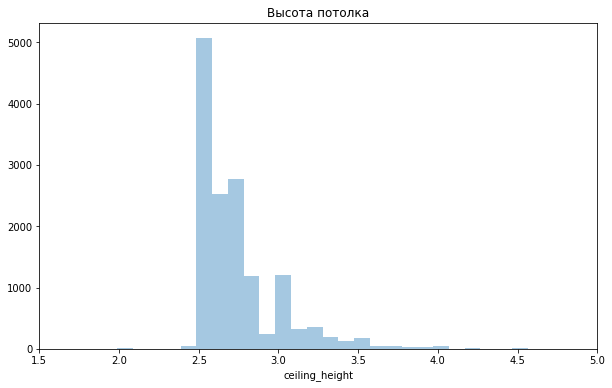

In [29]:
dist_hist(df,'ceiling_height', (1.5,5), 1000,'Высота потолка')

Большинство объектов недвижимости имеют высоту потолка до 3 м.

Text(0.5, 1.0, 'Время размещения, дни')

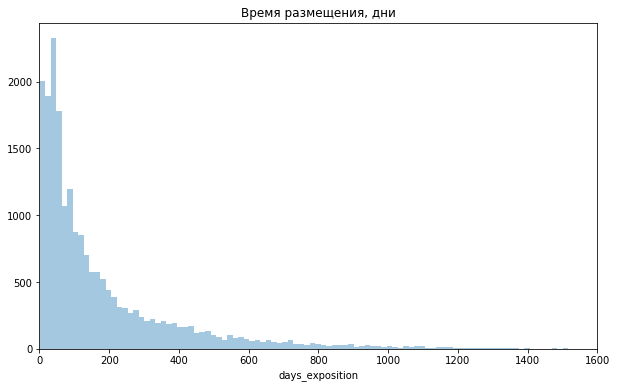

In [30]:
dist_hist(df,'days_exposition', (0,1600), 100,'Время размещения, дни')

Здесь также видно, что время размещения редко превышает 400 дней, хоть и есть записи с экстремально большими показателями.

Посмотрим на данный признак подробнее:

In [31]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Отсюда мы узнаем, что среднее и медианное время продажи отличается почти в 2 раза.**

Медиана - 95 дней, Среднее - 180.

Интерквартильный размах колеблется в промежутке [45; 232] дней. Соответственно, можно сказать, что продажи объектов обычно занимают от 1,5 месяца до 7-8 месяцев. Продажи в течение 1,5 месяца можно считать быстрыми, больше 8 месяцев - долгими.**

Предлагаем оценить зависимость времени размещения (продажи) от типа населенного пункта

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


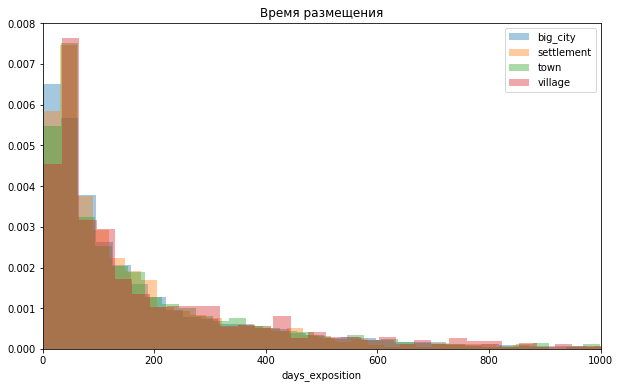

In [32]:
#почему-то в легенде нужно  
settles = ['big_city', 'settlement','town', 'village','']
plt.figure(figsize=(10,6))
plt.xlim(0, 1000)

for settle in settles:
    plt.legend(settles)
    ax = sns.distplot(df.query('type_settlement == @settle')['days_exposition'],kde=False, bins=50, norm_hist=True).set_title('Время размещения')

По данному графику видно, что все квартиры независимо от типа населенного пункта продаются чаще всего быстрее, чем за 200 дней.

Однако для недвижимости в деревне характерно, что она продается дольше (так как мы используем относительные показатели по группам)

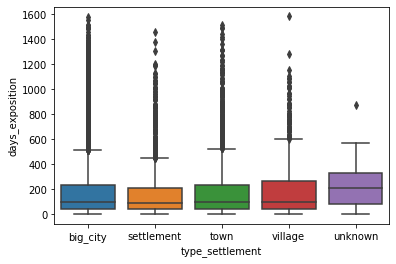

In [33]:
sns.boxplot(x = "type_settlement", y = "days_exposition", data = df, orient="v")

Из этого графика видно, что медианные значения примерно совпадают, отличается только количество выбросов для каждой категории.

In [34]:
print('Количество квартир, продавашихся дольше 1000 дней {}'.format(df[df['days_exposition'] > 1000].shape[0]))
print('Количество квартир, продавашихся дольше 800 дней {}'.format(df[df['days_exposition'] > 800].shape[0]))

Количество квартир, продавашихся дольше 1000 дней 276
Количество квартир, продавашихся дольше 800 дней 591


Как правильно сделать срез в данных?

Нами предлагается сделать срез по значению в 1000 дней:

In [35]:
data_new = df.query('days_exposition < 1000')

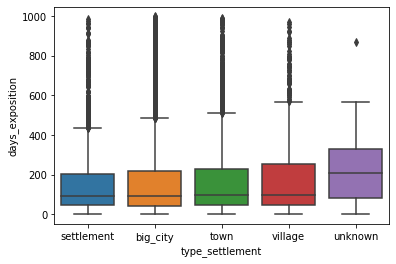

In [36]:
sns.boxplot(x = "type_settlement", y = "days_exposition", data = data_new, orient="v")

Выбивающиеся значения по количеству дней продажи - устранены

In [37]:
data_factors = ['total_images','price_per_meters','rooms']

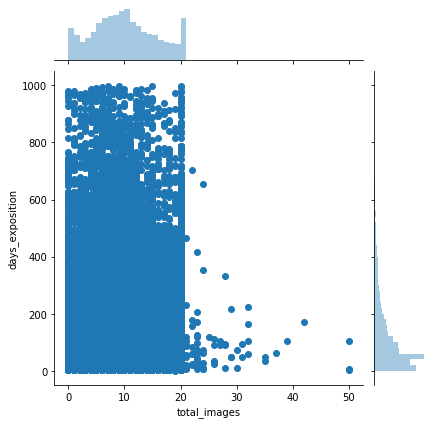

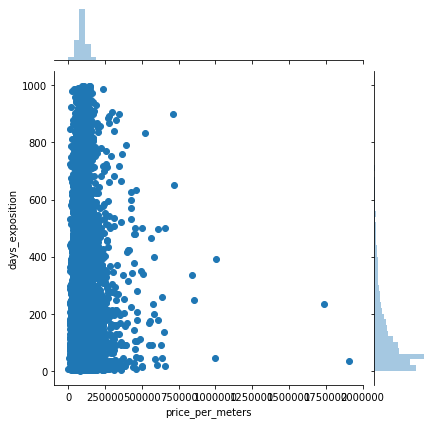

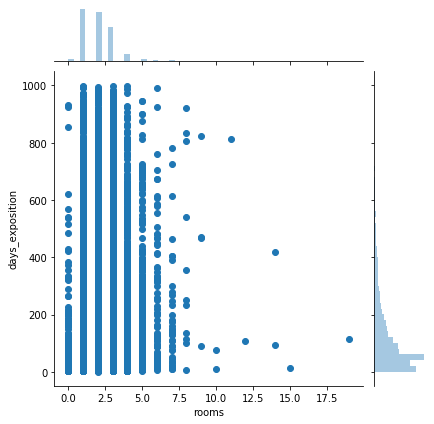

In [38]:
for factor in data_factors:
    g = sns.jointplot(x=factor, y="days_exposition", data=data_new)

Text(0.5, 1.0, 'Рассеяние времени продажи от этажа квартиры')

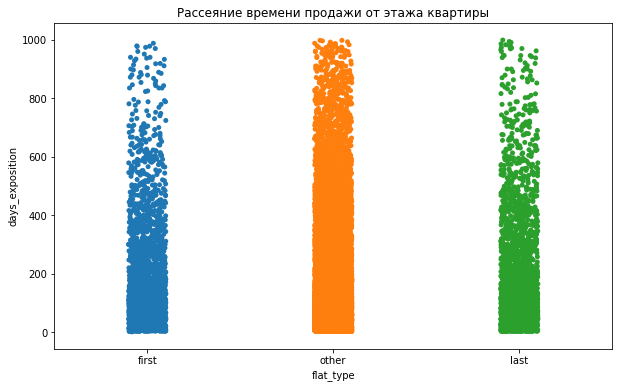

In [39]:
plt.figure(figsize=(10,6))

sns.stripplot(x="flat_type", y="days_exposition", data=data_new).set_title('Рассеяние времени продажи от этажа квартиры')

Для квартир, расположенных на первом или последних этажах, характерно, что они реже попадают в долгие продажи

In [40]:
data_factors2 = ['weekday','month', 'year']

<Figure size 720x432 with 0 Axes>

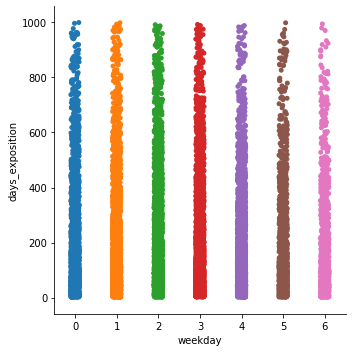

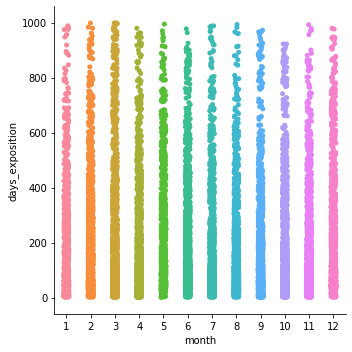

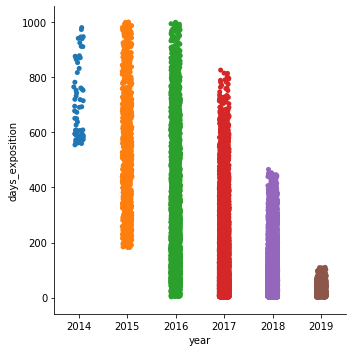

In [41]:
plt.figure(figsize=(10,6))
for factor in data_factors2:
    g = sns.catplot(x=factor, y="days_exposition", data=data_new)

Дополнительно построим тепловую карту корреляции по взятым нами признакам для графиков ранее, чтобы численно оценить отношения

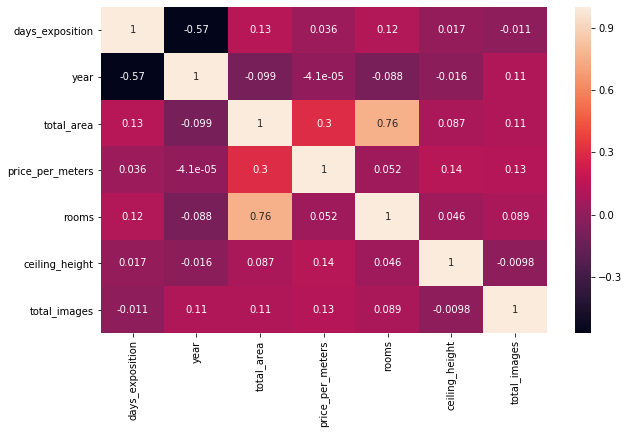

In [42]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data_new[['days_exposition','year','total_area','price_per_meters','rooms','ceiling_height','total_images']].corr(method='pearson'), annot=True)

**Интерпретация результатов визуализации:**

1) **График по дням недели:** Самое плотное распределение пришлось на будни дни, в особенности на вторник, среду и четверг. Однако, затяжных продаж среди объявлений выставленных в выходных немного меньше

2) **График по месяцам:** Квартиры выставленные с августа по ноябрь, реже оказываются в долгих продажах. В этих категориях меньше данных о долгих продажах.

3) **График по годам:** С годами доля долгих продаж смещается в сторону уменьшения срок от выставления объявления до положительного отклика от него. Однако это не совсем верное замечание, в 2014 году сервисы по продаже недвижимости были популярны, но у покупателей были равноценные альтернативы в виде риелтерских агенств и других способов покупки квартиры. Постепенно, завоевав доверие, они стали более востребованными, пока не заняли лидирующие позиции по популярности среди пользователей. А в 2018 году, вполне возможно, сервис стал работать более эффективно за счет внедрения ранжирования для конкретных людей и более human-friendly предложений. 

Несмотря на то, что у нас имеют данные только за выставленные квартиры в мае 2019-го года, уже сейчас можно сказать, что период от выставления на продажу до покупки квартиры существенно сократился даже по сравнению с 2018 годом.

**Интерпретация корреляционной матрицы (тепловой карты) по методу $$x^2$$**

Видно, что существует средняя связь между временем продажи и годом объявления - корреляция обратная, так как с увеличением года - уменьшается время продажи. Также, присутствует слабая связь между ценой и временем продажи. Остальные признаки слабо коррелируют.

Корреляция между количеством комнат и площадью - ясна.

**Далее, произведем выборку населенных пунктов с наибольшим числом объявлений**

In [43]:
m_pop_list = data_new.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index

In [44]:
data_most = data_new.query('locality_name in @m_pop_list')
len(data_most['locality_name'].unique())

10

In [45]:
most_price = data_most.pivot_table(index='locality_name', values='price_per_meters', aggfunc={'mean','median'})

In [46]:
most_price.columns = ['Средняя цена за кв.м.','Медианная цена за кв.м.']
most_price.sort_values(by = 'Средняя цена за кв.м.', ascending=False)

,Средняя цена за кв.м.,Медианная цена за кв.м.
locality_name,,
Санкт-Петербург,112219.562448,103000.000000
Пушкин,102174.177967,97988.680008
деревня Кудрово,92421.528671,91734.972678
поселок Парголово,89423.993853,91346.153846
поселок Мурино,85852.666869,86171.497585
поселок Шушары,77937.129103,76037.183544
Колпино,74803.643532,73820.928519
Всеволожск,68623.139486,65789.473684
Гатчина,67928.326990,67180.706522


Самая высокая средняя цена, как и ожидалось, в Санкт-Петербурге. Однако, если посмотреть на медианное значение, то они отличаются почти на 10 тыс. рублей за кв.м. В то же время, в других популярных населенных пунктах нет такого существенного отличия. Это спровоцированно тем, что в Санкт-Петербурге присутствует luxury сегмент квартир, которые сдвигают среднее значение в сторону повышения цены за кв.м.

Цена снижается для городов по мере удаления от Санкт-Петербурга. Поселки, скорее всего, принадлежат к агломерации Северной столицы и поэтому цены на них также остаются высокими

Стоит пристальней посмотреть на предложения квартир в Санкт-Петербурге - это самая большая группа, в которой мы можем найти интересные закономерности

In [47]:
d_spb = data_new.query('locality_name == "Санкт-Петербург"')
d_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_per_meters,weekday,month,year,flat_type,living_to_total,kitchen_to_total
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,False,Санкт-Петербург,21741,13933,1,90,2,574,558.0,big_city,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,False,Санкт-Петербург,28098,6800,2,84,3,234,424.0,big_city,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,False,Санкт-Петербург,31856,8098,2,112,1,48,121.0,big_city,100000.000000,1,6,2018,other,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,True,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,big_city,88524.590164,6,2,2017,other,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,False,Санкт-Петербург,38357,13878,1,310,2,553,137.0,big_city,127525.252525,3,11,2017,other,0.512626,0.214646
15,16,4650000,39.0,2017-11-18,1,NaN,14,20.5,5,False,False,False,7.6,True,Санкт-Петербург,12900,14259,1,590,1,296,19.0,big_city,119230.769231,5,11,2017,other,0.525641,0.194872
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,False,Санкт-Петербург,22108,10698,3,420,0,NaN,397.0,big_city,81707.317073,3,11,2017,first,0.678049,0.109756
17,6,4180000,36.0,2016-09-09,1,NaN,17,16.5,7,False,False,False,11.0,True,Санкт-Петербург,33564,14616,0,NaN,1,859,571.0,big_city,116111.111111,4,9,2016,other,0.458333,0.305556
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,False,5.6,True,Санкт-Петербург,44060,10842,1,759,0,NaN,168.0,big_city,104838.709677,4,1,2017,other,0.625806,0.180645
19,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,False,Санкт-Петербург,38900,12843,0,NaN,0,NaN,97.0,big_city,117355.371901,2,1,2019,other,0.628099,0.099174


Удалим пропущенные значения:

In [48]:
d_spb = d_spb.dropna(subset=['cityCenters_nearest']).reset_index()

In [49]:
d_spb.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_per_meters,weekday,month,year,flat_type,living_to_total,kitchen_to_total
0,2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,False,...,21741,13933,1,90,2,574,558.0,big_city,92785.714286,3,8,2015,other,0.612500,0.148214
1,3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,False,...,28098,6800,2,84,3,234,424.0,big_city,408176.100629,4,7,2015,other,NaN,NaN
2,4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,False,...,31856,8098,2,112,1,48,121.0,big_city,100000.000000,1,6,2018,other,0.320000,0.410000
3,9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,True,...,50898,15008,0,NaN,0,NaN,289.0,big_city,88524.590164,6,2,2017,other,0.714754,0.106557
4,10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,False,...,38357,13878,1,310,2,553,137.0,big_city,127525.252525,3,11,2017,other,0.512626,0.214646


Посмотрим зависимость цены квадратного метра от удаленности от центра. Переведем удаленность от центра в километра

In [50]:
d_spb['km_to_center'] = (d_spb['cityCenters_nearest']/1000).astype('int')

Рассчитаем ранговую корреляцию по Спирмену для цены

In [84]:
d_spb['km_to_center'].corr( d_spb['last_price'], method='spearman')

-0.4177796143591757

Построим сводную таблицу по сгруппированным данным:

In [91]:
pivot = d_spb.pivot_table(index='km_to_center', values='price_per_meters', aggfunc={'mean','median'})
pivot

,mean,median
km_to_center,,
0,167255.548712,129777.103173
1,155407.738881,122448.979592
2,144171.568490,113032.223903
3,126403.912282,106756.756757
4,135422.784604,124875.000000
5,145379.054933,125000.000000
6,143993.870063,125923.645320
7,141722.936758,123979.166667
8,118102.025833,110655.737705


141 тыс. рублей на 7-м километре, против 117 тыс. рублей на 8 км. Вот наша граница, но всё таки нужно построить график, чтобы убедиться полностью

In [87]:
pivot['km_to_center'] = pivot.index

In [88]:
pivot.corr()

,mean,median,km_to_center
mean,1.000000,0.928541,-0.841616
median,0.928541,1.000000,-0.738364
km_to_center,-0.841616,-0.738364,1.000000


По корреляционной матрице получили, что меры среднего имеют сильную обратную связь от расстояния – чем расстояние от центра меньше, тем выше цена за кв.м.

Построим график распределения цены за кв.м. от расстояния в километрах

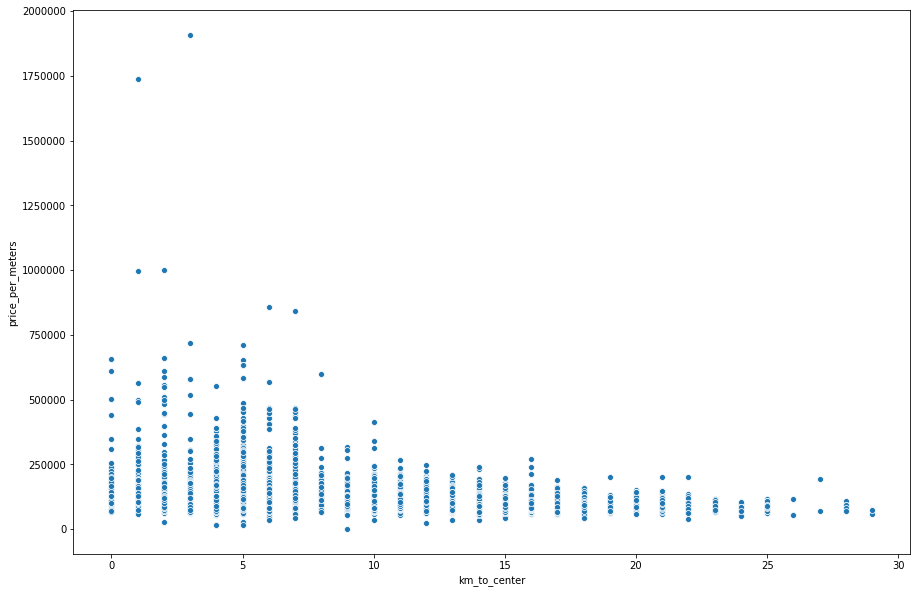

In [52]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="km_to_center", y="price_per_meters", data=d_spb)

Вполне логичная зависимость - чем ближе к центру, тем больше возрастает стоимость жилья. В графике имеется провал, однако он мог быть вызван недостатком данных для некоторых значений удаления от центра в 3000-4000м.

По этому графику можно понять, что на расстоянии 7 км от центра появляются квартиры, которые являются достаточно дорогими. 

Таким образом, 7км - вот наш рабочий радиус. Данные подтвердили сводная таблица и график

Взглянем на квартиры в центре более подробно

In [53]:
spb_center = d_spb.query('km_to_center < 8')
spb_center.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_per_meters,weekday,month,year,flat_type,living_to_total,kitchen_to_total,km_to_center
1,3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,False,...,6800,2,84,3,234,424.0,big_city,408176.100629,4,7,2015,other,NaN,NaN,6
12,24,8,6500000,97.2,2015-10-31,2,NaN,3,46.5,1,False,False,False,19.6,False,...,2336,3,411,3,124,265.0,big_city,66872.427984,5,10,2015,first,0.478395,0.201646,2
20,35,6,15500000,149.0,2017-06-26,5,NaN,5,104.0,4,False,False,False,17.0,False,...,3502,0,NaN,1,779,644.0,big_city,104026.845638,0,6,2017,other,0.697987,0.114094,3
26,51,7,45000000,161.0,2017-10-17,3,3.2,8,38.0,4,False,False,False,50.0,False,...,6589,0,NaN,3,99,541.0,big_city,279503.105590,1,10,2017,other,0.236025,0.310559,6
32,61,18,7990000,74.0,2017-08-24,2,NaN,4,43.0,4,False,False,False,20.0,False,...,4288,1,363,0,NaN,609.0,big_city,107972.972973,3,8,2017,last,0.581081,0.270270,4
33,63,2,20000000,118.0,2018-09-11,3,3.0,9,68.0,7,False,False,False,16.0,False,...,4800,1,648,1,779,37.0,big_city,169491.525424,1,9,2018,other,0.576271,0.135593,4
42,94,3,3500000,29.5,2019-04-26,1,2.5,5,15.6,2,False,False,False,5.5,True,...,7303,0,NaN,0,NaN,4.0,big_city,118644.067797,4,4,2019,other,0.528814,0.186441,7
46,99,32,9600000,90.0,2017-09-26,4,NaN,5,67.0,2,False,False,False,8.0,False,...,2818,0,NaN,0,NaN,104.0,big_city,106666.666667,1,9,2017,other,0.744444,0.088889,2
52,106,9,10500000,124.1,2017-05-25,5,3.2,4,79.4,3,False,False,False,20.0,False,...,5527,1,384,0,NaN,6.0,big_city,84609.186140,3,5,2017,other,0.639807,0.161160,5
53,111,4,4590000,40.0,2017-05-29,1,NaN,6,18.0,1,False,False,False,10.0,False,...,6175,1,241,0,NaN,31.0,big_city,114750.000000,0,5,2017,first,0.450000,0.250000,6


Text(0.5, 1.0, 'Комнаты')

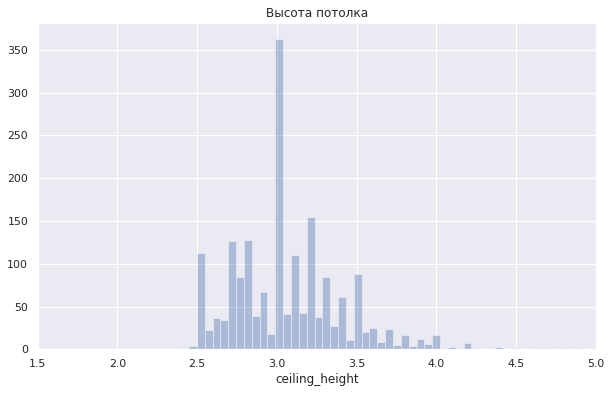

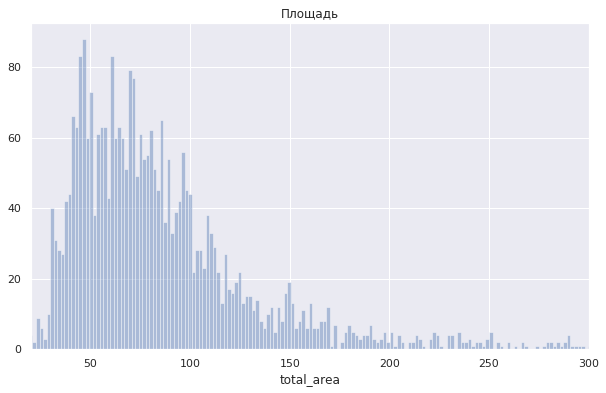

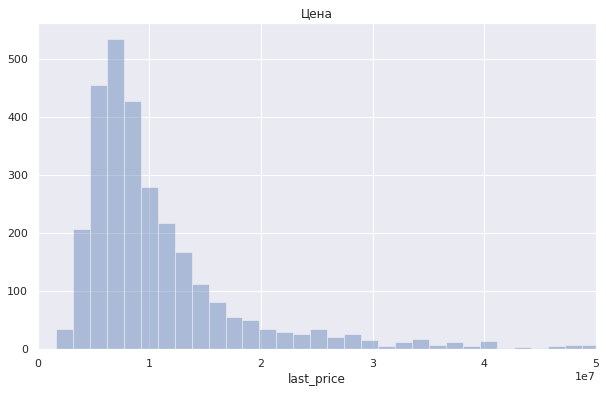

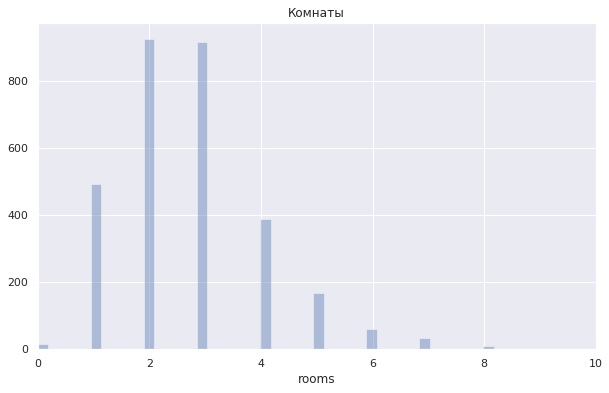

In [54]:
sns.set()
dist_hist(spb_center,'ceiling_height', (1.5,5), 500,'Высота потолка')
dist_hist(spb_center,'total_area', (20,300), 500,'Площадь')
dist_hist(spb_center,'last_price', (0,50000000), 500,'Цена')
dist_hist(spb_center,'rooms', (0,10), 100,'Комнаты')

<Figure size 720x432 with 0 Axes>

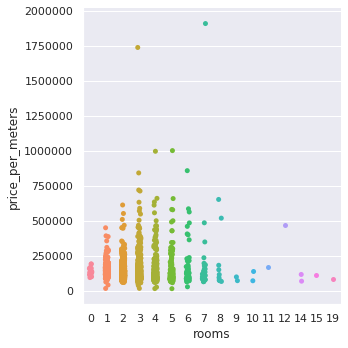

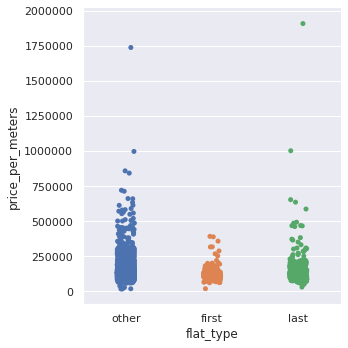

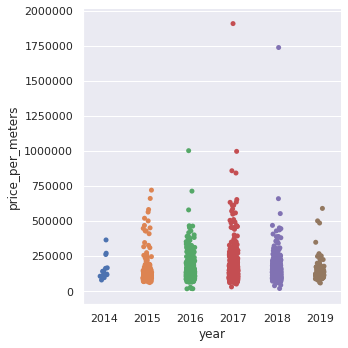

In [55]:
plt.figure(figsize=(10,6))
g = sns.catplot(x='rooms', y="price_per_meters", data=spb_center)
g = sns.catplot(x='flat_type', y="price_per_meters", data=spb_center)
g = sns.catplot(x='year', y="price_per_meters", data=spb_center)

За исключением выбросов, цены на квартиры по количеству комнат распределились нормально. Они возрастают до 4, а потом падают. Значит, дорогие квартиры обычные имеют 4-5 комнат, не больше

Самые дешевые квартиры  на первом этаже, а вот группы посередине и на последнем этаже не отличаются так уж слишком. Хотя чаще квартиры посередине также являются дорогими

В 2015, 2017 году рынок недвижимость испытал подъем - средняя цена за кв.м. была выше, чем в другие года (2016, 2018, 2019)

In [56]:
spb_center.pivot_table(index='km_to_center', values='price_per_meters', aggfunc={'mean','median'})

,mean,median
km_to_center,,
0,167255.548712,129777.103173
1,155407.738881,122448.979592
2,144171.568490,113032.223903
3,126403.912282,106756.756757
4,135422.784604,124875.000000
5,145379.054933,125000.000000
6,143993.870063,125923.645320
7,141722.936758,123979.166667


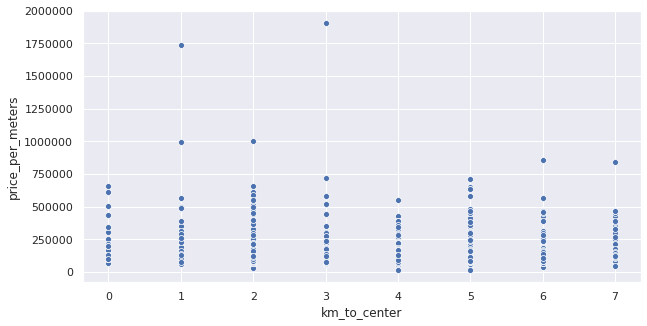

In [57]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="km_to_center", y="price_per_meters", data=spb_center)

По данному графику видно, что самая высокая цена за кв.м. принадлежит квартира, удаленным от центра примерно на 2 км, 0 км. Значение для квартир удаленных на расстояние 3 км, испытывает провал в среднем и медианном показателе цены за кв.м. 

Однако в целом все квартиры в центре похожи друг на друга. Средние значения превышают 140 тыс. рублей за кв.м.(кроме сегментов 3 и 4 км). И, как и ожидалось, в радиусе 2 км - самые дорогие цены на жилье.

**Предлагаем посмотреть на квартиры с выбивающимися значениями по стоимости за кв.м.:**

In [97]:
spb_center[spb_center['price_per_meters'] > 75000].sort_values(by='price_per_meters', ascending=False).head(15)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_per_meters,weekday,month,year,flat_type,living_to_total,kitchen_to_total,km_to_center
7346,12971,19,763000000,400.0,2017-09-30,7,NaN,10,250.0,10,False,False,False,NaN,True,...,3956,1,530,3,756,33.0,big_city,1.907500e+06,5,9,2017,last,0.625000,NaN,3
808,1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,False,...,1197,3,519,3,285,233.0,big_city,1.736842e+06,2,4,2018,other,0.500000,0.210526,1
8349,14706,15,401300000,401.0,2016-02-20,5,NaN,9,204.0,9,False,False,False,24.0,True,...,2389,1,545,1,478,393.0,big_city,1.000748e+06,5,2,2016,last,0.508728,0.059850,2
2817,4996,20,124000000,124.5,2017-10-12,4,3.00,4,67.2,2,False,False,False,20.0,False,...,1722,3,302,3,172,45.0,big_city,9.959839e+05,3,10,2017,other,0.539759,0.160643,1
9344,16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,False,...,6235,3,400,3,140,249.0,big_city,8.575429e+05,0,4,2017,other,0.639832,0.104305,6
9457,16647,15,122000000,145.0,2017-04-25,3,3.30,6,36.0,2,False,False,False,72.0,False,...,7023,2,478,3,250,335.0,big_city,8.413793e+05,1,4,2017,other,0.248276,0.496552,7
3661,6462,2,82000000,114.0,2015-12-17,3,NaN,5,78.5,4,False,False,False,20.0,False,...,3400,2,218,3,69,651.0,big_city,7.192982e+05,3,12,2015,other,0.688596,0.175439,3
5038,8900,13,190870000,268.0,2016-03-25,3,NaN,8,132.0,7,False,False,False,40.0,False,...,5297,0,NaN,2,198,901.0,big_city,7.122015e+05,4,3,2016,other,0.492537,0.149254,5
1391,2536,16,159984000,242.4,2015-08-27,4,3.85,9,131.0,7,False,False,False,20.0,False,...,2242,1,679,1,227,501.0,big_city,6.600000e+05,3,8,2015,other,0.540429,0.082508,2
10902,19155,20,160000000,243.0,2018-11-12,5,NaN,5,145.0,4,False,False,False,33.0,False,...,555,3,285,1,200,18.0,big_city,6.584362e+05,0,11,2018,other,0.596708,0.135802,0


Получили список квартир с параметрами, которые похожи на квартиры, относящиеся к luxury сегменту. Аномалией не обнаружено

Теперь взглянем на самые дешевые квартиры в центр.

In [106]:
spb_center[spb_center['price_per_meters'] < spb_center['price_per_meters'].quantile(0.25)][['last_price','price_per_meters','total_area','km_to_center','ponds_around3000','parks_around3000','flat_type']].sort_values(by='price_per_meters', ascending=True).head(15)

,last_price,price_per_meters,total_area,km_to_center,ponds_around3000,parks_around3000,flat_type
10127,1800000,15345.268542,117.30,5,0,0,other
11355,2200000,15861.571738,138.70,4,2,0,other
12115,3200000,16842.105263,190.00,4,0,1,other
13236,1600000,17391.304348,92.00,4,3,1,first
7795,2100000,26250.000000,80.00,5,1,1,other
4405,4390000,28919.631094,151.80,2,0,0,last
4903,3500000,37234.042553,94.00,6,0,1,other
13360,2850000,41911.764706,68.00,7,3,2,other
1362,12500000,49019.607843,255.00,6,3,0,last
4890,5400000,54000.000000,100.00,4,0,1,last


Для первых записей - не совсем понятно откуда могли взяться такие низкие значения стоимости за квадратный метр. Потенциальные махинации с недвижимостью. Лучше проверить данные квартиры.

Но всё же, теперь стало понятно почему бывают относительно дешевые квартиры в центре - удаленные от скверов и прудов.

Для полноты понимания недвижимости однако лучше добавить учше всего добавить ещё параметров, таких как - насколько старое здание, удаление от метро и достопримечательностей.

**Резюме работы:**

1) Нами был проведен анализ набора данных по объявлениям. В данных находились ошибки, которые в некоторых случаях получилось обработать и заполнить, в некоторых - нет.

2) На этапе предобработки мы выделили дополнительные производные признаки, как цена за кв.м., расположение квартиры, день недели, месяц, год размещения объявления.

3) По имеющимся данным, мы выделили, что продажа квартиры в 50% занимает до 95 дней, в 75% случаев не превышает срок в 7-8 месяцев

4) После активной экспансии сервиса, качественно улучшился рынок недвижимости - время, которое проходит объявление от публикации до сделки, существенно сократилось.

5) Было произведено углубленное изучение группы объявлений в Санкт-Петербурге - по производному признаку – цена за кв.м. жилья – обнаружилось, что квартиры на расстоянии до 7 км от центра принадлежат к сегменту недвижимости "Санкт-Петербург Центр". В них стоимость за кв.м. превышала 120 тыс. рублей.

6) Интересное наблюдение - квартиры на расстоянии 3 км по каким-либо причинам имели провал в средней цене по отношению как к квартирам ближе, так и дальше от геоточки центра города.

### Шаг 5. Общий вывод

По итогам проделанной работы мы получили следующие выводы:

1) Время продажи изменяется в сторону уменьшения в течение нескольких лет - скорее всего, это результат работы сервиса и роста его популярности. Информационные технологии помогают найти оптимальный вариант быстрее.

2) Доля затяжных продаж среди квартир на последних и первых этажах - меньше. Это связано с отличием в стоимости. Предположение: на первом этаже меньше стоимость - больше потенциальных покупателей, на последних - покупатели целенаправленно ищут квартиру с таким параметром.

3) Стоимость квартиры напрямую коррелирует с её площадью и удаленностью от центра. Чем больше площадь, тем больше цена (прямая связь). Чем ближе к центру, тем цена также выше (обратная связь).

4) По динамике цены от года можно судить о том, когда рынок был "горячий" (цена на недвижимость была выше) - это 2018 год

5) Однокомнатные квартиры и студии в центре не могут превышать стоимости 50000 рублей за кв.м., 2-х комнатные 75 тыс. рублей.

6) Цена ниже значительно ниже 120 тыс. рублей в центре - аномалия, которую нужно проверить на предмет мошенничества и сговора по операциям с недвижимостью. Аналогично для квартир существенно превышающие, также должны быть проверены модератором сервиса.

7) Найти квартиру в центре за разумные деньги - возможно, непонятно как сложно будет до неё добираться и насколько комфортные будут условия проживания, но это будет квартира в центре по подъемной цене!

Таким образом, по полученным нами данным можно выделять "нормальные" квартиры на рынке и те, которые лучше проверить. Также наши данные можно использовать, чтобы выделять сегменты продажи квартиры. Однако тогда придется добавить в нашу модель ещё параметров (удаленность от метро, достопримечательность и, например, количество кафе и ресторанов поблизости) 